In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold, GridSearchCV, cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings('ignore')

In [12]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [13]:
df = pd.read_csv('120_Full_Sample_With_Features_For_NBU.csv', encoding = '"Windows-1251"' )

In [14]:
df.shape

(8788, 278)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8788 entries, 0 to 8787
Columns: 278 entries, OfferID to x276
dtypes: float64(124), int64(125), object(29)
memory usage: 18.6+ MB


Проверяваме за ненулеви стойности, очевидно колоната x255 е с дати, но ще я премахнем.

In [16]:
df.isnull().sum()

OfferID        0
Bad_Flag       0
x1             0
x2             0
x3             0
x4             0
x5             0
x6             0
x7             0
x8             0
x9             0
x10            0
x11            0
x12            0
x13            0
x14            0
x15            0
x16            0
x17            0
x18            0
x19            0
x20            0
x21            0
x22            0
x23            0
x24            0
x25            0
x26            0
x27            0
x28            0
x29            0
x30            0
x31            0
x32            0
x33            0
x34            0
x35            0
x36            0
x37            0
x38            0
x39            0
x40            0
x41            0
x42            0
x43            0
x44            0
x45            0
x46            0
x47            0
x48            0
x49            0
x50            0
x51            0
x52            0
x53            0
x54            0
x55            0
x56            0
x57           

In [17]:
df = df.drop(columns = 'x255')

 Направете необходимите операции, за да присвоите на категорийните променливи числови стойности, така че те да могат да бъдат използвани в модел;

In [18]:
df.dtypes[df.dtypes==np.object]

x2      object
x3      object
x4      object
x5      object
x6      object
x7      object
x8      object
x9      object
x10     object
x11     object
x12     object
x13     object
x14     object
x15     object
x16     object
x184    object
x193    object
x194    object
x195    object
x253    object
x256    object
x260    object
x261    object
x262    object
x273    object
x274    object
x275    object
x276    object
dtype: object

In [19]:
categorical_columns = ['x2','x3','x4','x5','x7','x9','x10','x11','x12','x13','x193','x194','x256','x260','x261']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix = column, drop_first = True)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns = column)


In [20]:
categorical_columns = ['x6','x8','x195','x253','x262','x273','x274','x275','x276']
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix = column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns = column)

df.head()

OfferID  Bad_Flag  x1         x14         x15         x16  x17  x18  x19  \
0   533906         0  22  DPDCurrent  DPDCurrent  DPDCurrent    0    0    0   
1   574279         0  49  DPDCurrent  DPDCurrent  DPDCurrent    0    0    0   
2   487745         0  37  DPDCurrent  DPDCurrent  DPDCurrent    0    0    0   
3   468906         0  47  DPDCurrent  DPDCurrent  DPDCurrent    0    0    0   
4   537487         0  21  DPDCurrent  DPDCurrent  DPDCurrent    0    0    0   

   x20  x21     x22  x23  x24       x25     x26  x27  x28       x29  x30  x31  \
0    0    0     0.0  0.0  0.0   2542.00     0.0    0    0   2542.00    0    0   
1    0    0  4646.0  0.0  0.0  18800.00  4000.0    0    0  17658.00    0    0   
2    0    0     0.0  0.0  0.0    358.61     0.0    0    0    129.73    0    0   
3    0    0     0.0  0.0  0.0  31589.60   800.0    0    0  35416.95    0    0   
4    0    0     0.0  0.0  0.0      0.00   500.0    0    0      0.00    0    0   

       x32       x33     x34       x35      x36       x37     x38     x39  \
0     0.00   2542.00     0.0   2542.00     0.00   2542.00     0.0    0.00   
1  1886.51  18000.00  2000.0  17658.00  1886.51  18000.00  2000.0  197.00   
2     0.00    358.61     0.0    129.73     0.00    358.61     0.0   36.59   
3   722.00   1329.60   800.0    773.95   722.00   1329.60   800.0   94.64   
4     0.00      0.00     0.0      0.00     0.00      0.00     0.0    0.00   

      x40    x41  x42       x43     x44   x45  x46  x47  x48  x49  x50  x51  \
0    0.00   0.00  0.0   2542.00     0.0   0.0  0.0    0    0  0.0    0    0   
1  200.92   0.00  0.0  18800.00  4000.0  81.0  0.0    0    0  0.0    0    0   
2    0.00   0.00  0.0    358.61     0.0   0.0  0.0    0    0  0.0    0    0   
3  176.00  75.95  0.0  35770.19   800.0   0.0  0.0    0    0  0.0    0    0   
4    0.00   0.00  0.0      0.00     0.0   0.0  0.0    0    0  0.0    0    0   

   x52  x53  x54  x55  x56  x57  x58  x59  x60  x61  x62   x63  x64  x65  \
0    0    0    0    0    0    0    0    0    0  0.0    0   0.0  0.0  0.0   
1    0    0    0    0    0    0    0    0    0  0.0    0  81.0  0.0  0.0   
2    0    0    0    0    0    0    0    0    0  0.0    0   0.0  0.0  0.0   
3    0    0    0    0    0    0    0    0    0  0.0    0   0.0  0.0  0.0   
4    0    0    0    0    0    0    0    0    0  0.0    0   0.0  0.0  0.0   

       x66     x67     x68      x69  x70    x71    x72    x73  x74       x75  \
0     0.00    0.00    0.00      0.0  0.0    0.0    0.0   0.00  0.0      0.00   
1     0.00  197.00  200.92  17658.0  0.0  800.0    0.0   0.00  0.0  17652.00   
2     0.00   36.59    0.00      0.0  0.0    0.0    0.0   0.00  0.0      0.00   
3     0.00  292.90  176.00  34643.0  0.0   20.0    0.0  98.44  0.0  34376.15   
4  1351.04    0.00    0.00      0.0  0.0    0.0  500.0   0.00  0.0      0.00   

   x76       x77  x78    x79      x80       x81      x82     x83      x84  \
0  0.0   2542.00  0.0    0.0     0.00   2542.00     0.00    0.00     0.00   
1  0.0  17658.00  0.0  800.0  1886.51  17658.00  1886.51    0.00  1886.51   
2  0.0      0.00  0.0    0.0     0.00    129.73     0.00  129.73     0.00   
3  0.0  35416.95  0.0   20.0     0.00  35416.95   722.00    0.00   722.00   
4  0.0      0.00  0.0    0.0   500.00      0.00     0.00    0.00     0.00   

       x85     x86      x87  x88       x89     x90     x91  x92    x93  x94  \
0      0.0     0.0      0.0  0.0      0.00     0.0    0.00  0.0   0.00  0.0   
1      0.0  2000.0      0.0  0.0      0.00  2000.0    0.00  0.0   0.00  0.0   
2      0.0     0.0      0.0  0.0      0.00     0.0    0.00  0.0   0.00  0.0   
3  28600.0     0.0  32942.0  0.0  32800.59     0.0  198.26  0.0  74.44  0.0   
4      0.0     0.0      0.0  0.0      0.00     0.0    0.00  0.0   0.00  0.0   

      x95  x96       x97      x98     x99  x100    x101  x102    x103  x104  \
0    0.00  0.0   2542.00     0.00     0.0     0     0.0   0.0     0.0   0.0   
1    0.00  0.0  17652.00  1860.05   800.0     0     0.0   0.0   800.0

In [21]:
df = df.drop(columns =['x14','x15','x16','x184'] )

Дескриптивни статистики на данните

In [22]:
df.describe()

OfferID     Bad_Flag           x1     x17     x18     x19  \
count    8788.000000  8788.000000  8788.000000  8788.0  8788.0  8788.0   
mean   515529.318389     0.113792    41.342399     0.0     0.0     0.0   
std     40850.728633     0.317576    12.799834     0.0     0.0     0.0   
min    452698.000000     0.000000    20.000000     0.0     0.0     0.0   
25%    479342.250000     0.000000    31.000000     0.0     0.0     0.0   
50%    510925.000000     0.000000    40.000000     0.0     0.0     0.0   
75%    554402.500000     0.000000    50.000000     0.0     0.0     0.0   
max    586653.000000     1.000000   120.000000     0.0     0.0     0.0   

          x20     x21            x22           x23           x24  \
count  8788.0  8788.0    8788.000000   8788.000000   8788.000000   
mean      0.0     0.0     311.385448    315.207109    238.834785   
std       0.0     0.0    3361.428170   1325.256975   1117.987273   
min       0.0     0.0       0.000000      0.000000      0.000000   
25%       0.0     0.0       0.000000      0.000000      0.000000   
50%       0.0     0.0       0.000000      0.000000      0.000000   
75%       0.0     0.0       0.000000      0.000000      0.000000   
max       0.0     0.0  165000.000000  51000.000000  51000.000000   

                 x25            x26     x27     x28            x29     x30  \
count    8788.000000    8788.000000  8788.0  8788.0    8788.000000  8788.0   
mean    14912.383173    2963.769885     0.0     0.0   12575.967457     0.0   
std     31839.773343    7119.820600     0.0     0.0   27615.633607     0.0   
min         0.000000       0.000000     0.0     0.0       0.000000     0.0   
25%       500.000000       0.000000     0.0     0.0      86.690000     0.0   
50%      4500.000000     500.000000     0.0     0.0    3010.035000     0.0   
75%     16724.750000    2450.000000     0.0     0.0   13596.250000     0.0   
max    786743.000000  180249.000000     0.0     0.0  624455.000000     0.0   

          x31            x32            x33           x34            x35  \
count  8788.0    8788.000000    8788.000000   8788.000000    8788.000000   
mean      0.0    2487.459611   10077.391568   2302.192342    8562.438827   
std       0.0    6643.817208   18695.842512   6029.980500   17108.523156   
min       0.0       0.000000       0.000000      0.000000       0.000000   
25%       0.0       0.000000       0.000000      0.000000       0.000000   
50%       0.0     358.400000    2654.500000    281.000000    1707.535000   
75%       0.0    1808.145000   12681.000000   1539.230000   10129.750000   
max       0.0  196633.000000  500000.000000  68900.000000  497160.000000   

                 x36            x37           x38          x39           x40  \
count    8788.000000    8788.000000   8788.000000  8788.000000   8788.000000   
mean     2130.108239    9953.252250   2298.664893   177.602089    136.347309   
std      5787.373995   18456.620742   6030.727345   245.516566    302.230313   
min         0.000000       0.000000      0.000000     0.000000      0.000000   
25%         0.000000       0.000000      0.000000     0.000000      0.000000   
50%       198.195000    2598.000000    250.000000   100.300000      0.000000   
75%      1380.250000   12503.250000   1500.000000   264.102500    164.857500   
max    162549.000000  500000.000000  68900.000000  3540.200000  10033.950000   

                x41          x42            x43            x44            x45  \
count   8788.000000  8788.000000    8788.000000    8788.000000    8788.000000   
mean      20.088937    12.061471   14622.107044    2745.383221     169.751145   
std      166.303063    65.343847   31038.060307    6896.711319    5782.255130   
min        0.000000     0.000000       0.000000       0.000000       0.000000   
25%        0.000000     0.000000     314.750000       0.000000       0.000000   
50%        0.000000     0.000000    4260.795000     500.000000       0.000000   
75%        0.000000     0.000000   16512.000000    2000.0

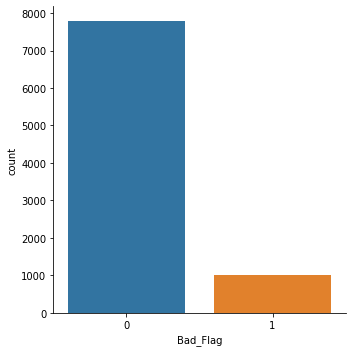

In [23]:
sns.catplot(x = 'Bad_Flag', kind = 'count', data = df)

In [24]:
x = df.drop(columns = 'Bad_Flag')
y = df['Bad_Flag']

Намалете размерността на данните (PCA, correlation, VIF);

Корелация

In [25]:
df.corr()

OfferID  Bad_Flag  \
OfferID                                             1.000000  0.038330   
Bad_Flag                                            0.038330  1.000000   
x1                                                 -0.046723 -0.138343   
x17                                                      NaN       NaN   
x18                                                      NaN       NaN   
x19                                                      NaN       NaN   
x20                                                      NaN       NaN   
x21                                                      NaN       NaN   
x22                                                 0.001103  0.013554   
x23                                                 0.046163  0.088866   
x24                                                 0.035384  0.086872   
x25                                                 0.061346 -0.048329   
x26                                                 0.036300  0.011259   
x27                                                      NaN       NaN   
x28                                                      NaN       NaN   
x29                                                 0.065492 -0.038611   
x30                                                      NaN       NaN   
x31                                                      NaN       NaN   
x32                                                 0.028437  0.018047   
x33                                                 0.060729 -0.030491   
x34                                                 0.021450  0.009030   
x35                                                 0.062645 -0.018940   
x36                                                 0.023750  0.022677   
x37                                                 0.061483 -0.030190   
x38                                                 0.021241  0.009157   
x39                                                 0.056403 -0.058211   
x40                                                 0.035851  0.084278   
x41                                                -0.004154  0.021636   
x42                                                 0.017963  0.067905   
x43                                                 0.063686 -0.047367   
x44                                                 0.025456  0.006549   
x45                                                -0.002957  0.028705   
x46                                                -0.005407  0.005684   
x47                                                 0.035202  0.013777   
x48                                                      NaN       NaN   
x49                                                 0.023594  0.034836   
x50                                                      NaN       NaN   
x51                                                      NaN       NaN   
x52                                                      NaN       NaN   
x53                                                      NaN       NaN   
x54                                                 0.028066 -0.006433   
x55                                                      NaN       NaN   
x56                                                 0.016656 -0.003823   
x57                                                      NaN       NaN   
x58                                                 0.023400  0.008202   
x59                                                 0.035202  0.013777   
x60                                                 0.016656 -0.003823   
x61                                                 0.023594  0.034836   
x62                                                 0.030036  0.006191   
x63                                                -0.003084  0.015629   
x64                                                 0.001216 -0.006672   
x65                                                -0.005407  0.005684   
x66                                                 0.007515  0.026137   
x67                                                 0.061

VIF

In [19]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

VIF Factor                                           features
0    1.100000e+00                                            OfferID
1    1.800000e+00                                                 x1
2             NaN                                                x17
3             NaN                                                x18
4             NaN                                                x19
5             NaN                                                x20
6             NaN                                                x21
7    1.300000e+00                                                x22
8    1.000000e+01                                                x23
9    8.700000e+00                                                x24
10            inf                                                x25
11            inf                                                x26
12            NaN                                                x27
13            NaN                                                x28
14            inf                                                x29
15            NaN                                                x30
16            NaN                                                x31
17            inf                                                x32
18            inf                                                x33
19            inf                                                x34
20            inf                                                x35
21            inf                                                x36
22            inf                                                x37
23            inf                                                x38
24            inf                                                x39
25   6.486900e+03                                                x40
26            inf                                                x41
27            inf                                                x42
28            inf                                                x43
29            inf                                                x44
30   1.450000e+01                                                x45
31            inf                                                x46
32            inf                                                x47
33            NaN                                                x48
34            inf                                                x49
35            NaN                                                x50
36            NaN                                                x51
37            NaN                                                x52
38            NaN                                                x53
39            inf                                                x54
40            NaN                                                x55
41            inf                                                x56
42            NaN                                                x57
43            inf                                                x58
44            inf                                                x59
45            inf                                                x60
46            inf                                                x61
47            inf                                                x62
48   2.700000e+01                                                x63
49   3.300000e+00                                                x64
50            inf                                                x65
51   1.400000e+00                                                x66
52            inf                                                x67
53   8.356200e+03                                                x68
54            inf                                                x69
55            inf                                                x70
56            inf                                                x71
57   

PCA

In [20]:
x = StandardScaler().fit_transform(x)
pca = PCA(.99)
pC = pca.fit_transform(x)
pCDF = pd.DataFrame(data = pC)
DF = pd.concat([pCDF, y], axis = 1)
DF.head()

0         1         2         3         4         5         6  \
0  2.776306 -3.726933 -2.051154 -1.898164  0.811009 -1.069794  0.599946   
1  0.263340  1.889521 -0.460188  0.215987 -0.796981 -2.225978  0.492517   
2 -5.314352 -2.615953 -1.827127 -1.833912  0.916629 -0.766212  0.458817   
3  4.034109  1.011806 -2.682616 -1.448115  1.683046  1.130265  1.194813   
4  5.632871 -5.315595  0.610330  0.762174  1.805311  2.128425  1.487182   

          7         8         9        10        11        12        13  \
0  0.277774  1.284922 -0.279354 -0.459187  0.000643 -0.099486 -0.837510   
1  1.255473 -1.787924 -0.815319  0.823444 -0.961644 -0.646917 -4.763853   
2  0.389718  1.790788 -0.164680 -0.657723 -0.232211 -0.266115 -1.392642   
3  0.803192  1.591144 -0.618220  1.829488 -0.471918  0.488826 -0.984112   
4 -0.526907  0.847200 -1.397734  3.827325 -0.458614  0.826252  0.129022   

         14        15        16        17        18        19        20  \
0 -1.220164  0.362044  0.159885  0.414137 -0.384475  1.007096  0.391010   
1 -0.060474  1.091423  0.368458 -0.556675  1.329171  2.042779  0.235604   
2 -0.429774  0.785881 -0.232898  1.002323 -2.251040  1.928041  0.110455   
3 -2.392977 -0.406880 -0.210119 -0.134810  1.728366 -0.855655 -0.487336   
4 -3.852853 -0.564914  2.705969  2.105064  1.839786  2.872949  0.675552   

         21        22        23        24        25        26        27  \
0 -1.033019  0.313603 -0.308120  0.747276  0.477265  0.194016  1.227101   
1 -2.870603  0.201009  0.833569 -0.708220 -0.082732 -0.953348  0.335624   
2  1.249681 -0.097476  0.170438 -0.200809  0.440399  0.078352  1.131899   
3 -0.827977  2.811870 -0.727914 -1.203535 -0.132705  0.935051  0.005353   
4 -2.228293  2.386547  0.026259 -0.224391  0.573611  0.363276  0.305465   

         28        29        30        31        32        33        34  \
0 -0.355971  0.358937  0.190024 -0.173521 -0.005844 -0.260105 -0.676466   
1  0.828005  0.704103 -0.338108  0.523437  0.225481  0.205536 -0.241140   
2  0.123592 -0.158247 -0.730042  1.066514 -0.436658 -0.717156  0.322328   
3 -0.804278  0.152320 -0.394715  0.092660 -0.522824 -0.416799 -0.948916   
4 -0.893160  0.434081 -1.076321  0.266143 -2.610724  1.285522 -1.821828   

         35        36        37        38        39        40        41  \
0  0.478044  0.026994 -0.366722  0.711047 -0.523377 -0.017152  0.402629   
1  0.389932 -0.540000 -0.188648  0.156822  0.031987 -0.935986 -0.930178   
2  0.902560 -0.212291 -0.347256  0.246602  0.061793 -0.296513  0.038889   
3  0.803178 -0.473005  0.200368 -1.166211  0.722845 -1.285591 -0.621486   
4 -0.484745  0.114842 -0.251083  0.652972 -1.906239  1.168581  0.075096   

         42        43        44        45        46        47        48  \
0 -0.400072 -0.810330 -0.338587  1.054265 -0.344406  0.250401  0.459207   
1  1.326628  0.419890 -0.352922  0.145457  0.931880  1.905852 -1.490572   
2  0.020836 -0.264944 -0.819694  1.171556  1.092803 -0.944429 -0.528020   
3  0.561324  0.128106  0.592954 -1.460172 -0.845705  0.979015 -1.441360   
4 -1.322796  1.473788  0.226013  0.064062 -0.937691 -0.873199  2.365651   

         49        50        51        52        53        54        55  \
0 -0.414332 -0.769597  0.211222  0.199417  0.678983 -0.012694  0.218340   
1 -1.373575  2.929037 -0.187945  1.185985 -0.065443  3.554917 -0.501283   
2 -0.128240  0.564183  0.416177  0.269915 -0.462049  0.129383  0.853242   
3  0.577621 -0.690816 -0.190315 -0.247862 -0.050477 -0.555291  0.635575   
4  1.270563 -0.448762 -1.386820  0.219762  1.283825  0.193458 -1.370441   

         56        57        58        59        60        61        62  \
0 -0.555172  0.357676 -0.932220 -0.113902 -0.571386 -0.147366 -0.148854   
1 -2.361161  1.208345 -0.535387  0.862784  1.063076 -1.278809 -0.240364   
2 -0.173462  1.323899 -0.012617  0.207613  0.026934  0.431003 -0.095405   
3  0.840520  0.868369  0.729664  0.115546  0.301740  0.495476  0.340110   
4  0.132350 -0.766553  0.87

Text(0.5, 0.85, '99% cut-off threshold')

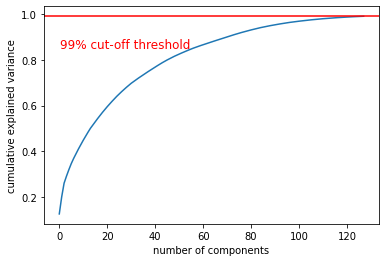

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y = 0.99, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=12)

Направете основен експлораторен анализ на обучителния набор;

In [22]:
df_train = pd.read_csv('X_train.csv', encoding='"ISO-8859-1"')
df_test = pd.read_csv('X_test.csv', encoding='"ISO-8859-1"')

In [23]:
df_train.isnull().sum()

Unnamed: 0       0
Bad_Flag         0
x1               0
x2               0
x3               0
x4               0
x5               0
x6               0
x7               0
x8               0
x10              0
x11              0
x12              0
x13              0
x14              0
x15              0
x16              0
x17              0
x18              0
x19              0
x20              0
x21              0
x22              0
x23              0
x24              0
x25              0
x26              0
x27              0
x28              0
x29              0
x30              0
x31              0
x32              0
x33              0
x34              0
x35              0
x36              0
x37              0
x38              0
x39              0
x40              0
x41              0
x42              0
x43              0
x44              0
x45              0
x46              0
x47              0
x48              0
x49              0
x50              0
x51              0
x52         

In [24]:
df_test.isnull().sum()

Unnamed: 0       0
Bad_Flag         0
x1               0
x2               0
x3               0
x4               0
x5               0
x6               0
x7               0
x8               0
x10              0
x11              0
x12              0
x13              0
x14              0
x15              0
x16              0
x17              0
x18              0
x19              0
x20              0
x21              0
x22              0
x23              0
x24              0
x25              0
x26              0
x27              0
x28              0
x29              0
x30              0
x31              0
x32              0
x33              0
x34              0
x35              0
x36              0
x37              0
x38              0
x39              0
x40              0
x41              0
x42              0
x43              0
x44              0
x45              0
x46              0
x47              0
x48              0
x49              0
x50              0
x51              0
x52         

In [25]:
df_train = df_train.drop(columns = 'x255')
df_test = df_test.drop(columns = 'x255')
df_train.x256 = df_train.x256.astype('category')
df_train = pd.get_dummies(df_train, columns = ['x256'], drop_first = True)
df_test.x256 = df_test.x256.astype('category')
df_test = pd.get_dummies(df_test, columns = ['x256'], drop_first = True)

In [26]:
df_train.dtypes[df_train.dtypes==np.object]

x2      object
x3      object
x4      object
x5      object
x6      object
x7      object
x8      object
x10     object
x11     object
x12     object
x13     object
x14     object
x15     object
x16     object
x184    object
x193    object
x194    object
x195    object
x253    object
x260    object
x261    object
x262    object
x273    object
x274    object
x275    object
x276    object
dtype: object

In [28]:
categorical_columns = ['x2','x3','x4','x5','x7','x10','x11','x12','x13','x193','x194','x260','x261']
for column in categorical_columns:
    tempdf = pd.get_dummies(df_train[column], prefix = column, drop_first = True)
    df_train = pd.merge(
        left=df_train,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_train = df_train.drop(columns = column)


In [29]:
categorical_columns = ['x6','x8','x195','x253','x262','x273','x274','x275','x276']
for column in categorical_columns:
    tempdf = pd.get_dummies(df_train[column], prefix = column)
    df_train = pd.merge(
        left=df_train,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_train = df_train.drop(columns = column)

df_train.head()

Unnamed: 0  Bad_Flag  x1         x14         x15         x16  x17  x18  \
0         707         0  56  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
1        5740         1  21  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
2        6646         0  31  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
3        6841         0  56  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
4         842         0  34  DPDCurrent  DPDCurrent  DPDCurrent    0    0   

   x19  x20  x21  x22  x23  x24       x25       x26  x27  x28       x29  x30  \
0    0    0    0  0.0  0.0  0.0   2428.33      0.00    0    0    963.02    0   
1    0    0    0  0.0  0.0  0.0      0.00   2300.00    0    0      0.00    0   
2    0    0    0  0.0  0.0  0.0   8500.00  29469.17    0    0   8220.00    0   
3    0    0    0  0.0  0.0  0.0  12660.00      0.00    0    0  11392.00    0   
4    0    0    0  0.0  0.0  0.0      0.00    600.00    0    0      0.00    0   

   x31       x32       x33       x34       x35       x36       x37       x38  \
0    0      0.00   1728.33      0.00    963.02      0.00   1728.33      0.00   
1    0   1277.27      0.00    800.00      0.00    777.27      0.00    800.00   
2    0  27234.56   7000.00  29469.17   6826.00  27234.56   7000.00  29469.32   
3    0      0.00  11660.00      0.00  10444.00      0.00  11660.00      0.00   
4    0    656.00      0.00    600.00      0.00    656.00      0.00    600.00   

      x39     x40  x41     x42       x43       x44  x45  x46  x47  x48  x49  \
0  167.61    0.00  0.0    0.00   2272.24      0.00  0.0  0.0    0    0  0.0   
1    0.00  169.23  0.0    0.00      0.00   1800.00  0.0  0.0    0    0  0.0   
2  104.49  497.93  0.0  122.11   8473.00  29469.32  0.0  0.0    0    0  0.0   
3  223.00    0.00  0.0    0.00  12603.00      0.00  0.0  0.0    0    0  0.0   
4    0.00  163.00  0.0  107.00      0.00    600.00  0.0  0.0    0    0  0.0   

   x50  x51  x52  x53  x54  x55  x56  x57  x58  x59  x60  x61  x62  x63  \
0    0    0    0    0    0    0    0    0    0    0    0  0.0    0  0.0   
1    0    0    0    0    0    0    0    0    0    0    0  0.0    0  0.0   
2    0    0    0    0    0    0    0    0    0    0    0  0.0    0  0.0   
3    0    0    0    0    0    0    0    0    0    0    0  0.0    0  0.0   
4    0    0    0    0    0    0    0    0    0    0    0  0.0    0  0.0   

      x64  x65  x66     x67     x68     x69       x70  x71  x72    x73  \
0    0.00  0.0  0.0  167.61    0.00     0.0      0.00  0.0  0.0   0.00   
1    0.00  0.0  0.0    0.00  169.23     0.0      0.00  0.0  0.0   0.00   
2    0.00  0.0  0.0  134.49  497.93  7742.0  27234.56  0.0  0.0  35.36   
3  269.09  0.0  0.0  223.00    0.00  9523.0      0.00  0.0  0.0   0.00   
4    0.00  0.0  0.0    0.00  163.00     0.0      0.00  0.0  0.0   0.00   

      x74      x75       x76       x77       x78     x79     x80       x81  \
0    0.00     0.00      0.00    260.83      0.00  700.22    0.00    963.02   
1    0.00     0.00      0.00      0.00      0.00    0.00  856.27      0.00   
2  122.11  7612.14  26905.12   8220.00  27234.56   22.00    0.00   8220.00   
3    0.00  9508.00      0.00  10008.00      0.00   57.00    0.00  11392.00   
4    0.00     0.00      0.00      0.00      0.00    0.00    0.00      0.00   

        x82      x83      x84  x85     x86  x87    x88  x89     x90  x91  x92  \
0      0.00   702.19     0.00  0.0     0.0  0.0    0.0  0.0     0.0  0.0  0.0   
1   1277.27     0.00  1277.27  0.0  1500.0  0.0  500.0  0.0  1000.0  0.0  0.0   
2  27234.56     0.00     0.00  0.0     0.0  0.0    0.0  0.0     0.0  0.0  0.0   
3      0.00  1384.00     0.00  0.0     0.0  0.0    0.0  0.0     0.0  0.0  0.0   
4    656.00     0.00   656.00  0.0     0.0  0.0    0.0  0.0     0.0  0.0  0.0   

   x93  x94    x95     x96       x97       x98     x99  x100    x101  x102  \
0  0.0  0.0   0.00    0.00    963.02      0.00   700.0     0     0.0   0.0   
1  0.0  0.0   0.00    0.00      0.00   1152.68     0.0     0     0.0   0.0   
2  0.0  0.0  50.3

In [30]:
df_train = df_train.drop(columns =['x14','x15','x16','x184','x194_26','x194_71','x194_97','x194_99'] )

In [31]:
df_test.dtypes[df_test.dtypes==np.object]

x2      object
x3      object
x4      object
x5      object
x6      object
x7      object
x8      object
x10     object
x11     object
x12     object
x13     object
x14     object
x15     object
x16     object
x184    object
x193    object
x194    object
x195    object
x253    object
x260    object
x261    object
x262    object
x273    object
x274    object
x275    object
x276    object
dtype: object

In [33]:
categorical_columns = ['x2','x3','x4','x5','x7','x10','x11','x12','x13','x193','x194','x260','x261']
for column in categorical_columns:
    tempdf = pd.get_dummies(df_test[column], prefix = column, drop_first = True)
    df_test = pd.merge(
        left=df_test,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_test = df_test.drop(columns = column)


In [34]:
categorical_columns = ['x6','x8','x195','x253','x262','x273','x274','x275','x276']
for column in categorical_columns:
    tempdf = pd.get_dummies(df_test[column], prefix = column)
    df_test = pd.merge(
        left=df_test,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_test = df_test.drop(columns = column)

df_test.head()

Unnamed: 0  Bad_Flag  x1         x14         x15         x16  x17  x18  \
0        6179         0  59  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
1        2213         0  71  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
2        4150         0  32  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
3        3360         0  36  DPDCurrent  DPDCurrent  DPDCurrent    0    0   
4        3736         0  45  DPDCurrent  DPDCurrent  DPDCurrent    0    0   

   x19  x20  x21     x22  x23  x24      x25     x26  x27  x28       x29  x30  \
0    0    0    0  3853.0  0.0  0.0  16000.0  3100.0    0    0  14897.00    0   
1    0    0    0     0.0  0.0  0.0  56996.0   650.0    0    0  43232.26    0   
2    0    0    0     0.0  0.0  0.0   2988.0     0.0    0    0   2097.31    0   
3    0    0    0     0.0  0.0  0.0      0.0   300.0    0    0      0.00    0   
4    0    0    0     0.0  0.0  0.0  13100.0     0.0    0    0   6320.47    0   

   x31     x32      x33     x34       x35     x36       x37     x38      x39  \
0    0  2942.0  15000.0  1100.0  13937.00  1100.0  15000.00  1100.0   184.00   
1    0   650.0  53496.0   650.0  39902.72   650.0  53496.00   650.0  1222.34   
2    0     0.0   2988.0     0.0   2097.31     0.0   2988.22     0.0   279.95   
3    0   222.0      0.0   300.0      0.00   222.0      0.00   300.0     0.00   
4    0     0.0  10000.0     0.0   3298.46     0.0  10000.00     0.0   247.52   

   x40     x41  x42       x43     x44  x45  x46  x47  x48  x49  x50  x51  x52  \
0  0.0    0.00  0.0  15955.00  3100.0  0.0  0.0    0    0  0.0    0    0    0   
1  0.0  221.86  0.0  63852.55   650.0  0.0  0.0    0    0  0.0    0    0    0   
2  0.0  120.09  0.0   2988.22     0.0  0.0  0.0    0    0  0.0    0    0    0   
3  0.0    0.00  0.0      0.00   300.0  0.0  0.0    0    0  0.0    0    0    0   
4  0.0    0.00  0.0  12990.01     0.0  0.0  0.0    0    0  0.0    0    0    0   

   x53  x54  x55  x56  x57  x58  x59  x60  x61  x62  x63  x64  x65     x66  \
0    0    0    0    0    0    0    0    0  0.0    0  0.0  0.0  0.0    0.00   
1    0    0    0    0    0    0    0    0  0.0    0  0.0  0.0  0.0    0.00   
2    0    0    0    0    0    0    0    0  0.0    0  0.0  0.0  0.0    0.00   
3    0    0    0    0    0    0    0    0  0.0    0  0.0  0.0  0.0  194.51   
4    0    0    0    0    0    0    0    0  0.0    0  0.0  0.0  0.0    0.00   

       x67    x68       x69  x70  x71  x72     x73  x74       x75  x76  \
0   184.00  351.0  13937.00  0.0  0.0  0.0    0.00  0.0  13882.00  0.0   
1  1222.34    0.0  39767.72  0.0  0.0  0.0  154.86  0.0  39486.80  0.0   
2   279.95    0.0      0.00  0.0  0.0  0.0    0.00  0.0      0.00  0.0   
3     0.00    0.0      0.00  0.0  0.0  0.0    0.00  0.0      0.00  0.0   
4   247.52    0.0   3298.46  0.0  0.0  0.0    0.00  0.0   3277.96  0.0   

        x77  x78     x79  x80       x81     x82      x83     x84  x85     x86  \
0  13937.00  0.0   45.00  0.0  14897.00  2942.0   960.00  2942.0  0.0  2000.0   
1  42097.34  0.0  183.15  0.0  43232.26   650.0  1134.92   650.0  0.0     0.0   
2   1034.00  0.0    0.00  0.0   2097.31     0.0  1063.31     0.0  0.0     0.0   
3      0.00  0.0    0.00  0.0      0.00   222.0     0.00   222.0  0.0     0.0   
4   6320.47  0.0  109.99  0.0   6320.47     0.0     0.00     0.0  0.0     0.0   

   x87     x88  x89     x90  x91    x92  x93  x94     x95  x96       x97  \
0  0.0  1842.0  0.0  2000.0  0.0  351.0  0.0  0.0    0.00  0.0  14837.00   
1  0.0     0.0  0.0     0.0  0.0    0.0  0.0  0.0  221.86  0.0  42869.65   
2  0.0     0.0  0.0     0.0  0.0    0.0  0.0  0.0  120.09  0.0   1944.25   
3  0.0     0.0  0.0     0.0  0.0    0.0  0.0  0.0    0.00  0.0      0.00   
4  0.0     0.0  0.0     0.0  0.0    0.0  0.0  0.0    0.00  0.0   6267.97   

      x98     x99  x100     x101  x102      x103  x104  x105  x106  x107  \
0  2942.0  1000.0     0   960.00   0.0    955.00   0.0   0.0     0   0.0   
1   650.0  3500.0     0  3329.54   0.0  10356.55   0.0   0.0     0   0.0   
2    

In [35]:
df_test = df_test.drop(columns =['x14','x15','x16','x184'] )

In [36]:
x_train = df_train.drop(columns = 'Bad_Flag')
y_train = df_train['Bad_Flag']
x_test = df_test.drop(columns = 'Bad_Flag')
y_test = df_test['Bad_Flag']

In [37]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Columns: 320 entries, Unnamed: 0 to x276_Íå
dtypes: float64(124), int64(124), uint8(72)
memory usage: 12.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Columns: 320 entries, Unnamed: 0 to x276_Íå
dtypes: float64(124), int64(124), uint8(72)
memory usage: 4.3 MB


Дескриптивни статистики:

In [38]:
df_train.describe()

Unnamed: 0     Bad_Flag           x1     x17     x18     x19     x20  \
count  6591.000000  6591.000000  6591.000000  6591.0  6591.0  6591.0  6591.0   
mean   4404.311182     0.113792    41.252921     0.0     0.0     0.0     0.0   
std    2523.372091     0.317582    12.737655     0.0     0.0     0.0     0.0   
min       0.000000     0.000000    20.000000     0.0     0.0     0.0     0.0   
25%    2210.500000     0.000000    31.000000     0.0     0.0     0.0     0.0   
50%    4453.000000     0.000000    40.000000     0.0     0.0     0.0     0.0   
75%    6584.500000     0.000000    50.000000     0.0     0.0     0.0     0.0   
max    8787.000000     1.000000   120.000000     0.0     0.0     0.0     0.0   

          x21            x22           x23           x24            x25  \
count  6591.0    6591.000000   6591.000000   6591.000000    6591.000000   
mean      0.0     348.421862    316.127727    241.171300   15110.472186   
std       0.0    3785.603451   1381.698371   1191.532203   32753.367349   
min       0.0       0.000000      0.000000      0.000000       0.000000   
25%       0.0       0.000000      0.000000      0.000000     500.000000   
50%       0.0       0.000000      0.000000      0.000000    4401.000000   
75%       0.0       0.000000      0.000000      0.000000   17076.500000   
max       0.0  165000.000000  51000.000000  51000.000000  786743.000000   

                x26     x27     x28            x29     x30     x31  \
count   6591.000000  6591.0  6591.0    6591.000000  6591.0  6591.0   
mean    2957.543767     0.0     0.0   12755.120513     0.0     0.0   
std     6926.611799     0.0     0.0   28387.862647     0.0     0.0   
min        0.000000     0.0     0.0       0.000000     0.0     0.0   
25%        0.000000     0.0     0.0      91.635000     0.0     0.0   
50%      500.000000     0.0     0.0    2988.000000     0.0     0.0   
75%     2400.000000     0.0     0.0   13974.000000     0.0     0.0   
max    92218.000000     0.0     0.0  624455.000000     0.0     0.0   

                 x32            x33           x34            x35  \
count    6591.000000    6591.000000   6591.000000    6591.000000   
mean     2496.586148   10107.705905   2281.830898    8599.539958   
std      6815.445553   19103.894729   5970.961295   17592.946794   
min         0.000000       0.000000      0.000000       0.000000   
25%         0.000000       0.000000      0.000000       0.000000   
50%       361.000000    2524.000000    291.990000    1622.000000   
75%      1762.015000   13000.000000   1514.000000   10414.500000   
max    196633.000000  500000.000000  68900.000000  497160.000000   

                 x36            x37           x38          x39           x40  \
count    6591.000000    6591.000000   6591.000000  6591.000000   6591.000000   
mean     2118.257113    9988.094931   2278.902041   176.188760    135.063414   
std      5848.487981   18884.072317   5971.398183   241.013274    305.653211   
min         0.000000       0.000000      0.000000     0.000000      0.000000   
25%         0.000000       0.000000      0.000000     0.000000      0.000000   
50%       200.000000    2500.000000    260.000000    99.000000      0.000000   
75%      1354.000000   12924.830000   1500.000000   264.000000    163.500000   
max    162549.000000  500000.000000  68900.000000  3035.000000  10033.950000   

               x41          x42            x43           x44            x45  \
count  6591.000000  6591.000000    6591.000000   6591.000000    6591.000000   
mean     18.213389    11.495359   14798.479263   2739.908433     189.551053   
std      64.937155    63.574623   31683.509399   6748.556398    6629.956507   
min       0.000000     0.000000       0.000000      0.000000       0.000000   
25%       0.000000     0.000000     316.080000      0.000000       0.000000   
50%       0.000000     0.000000    4209.460000    500.000000       0.000000   
75%       0.000000     0.000000   16947.000000   2000.000000       0.000000   
max    2059.00

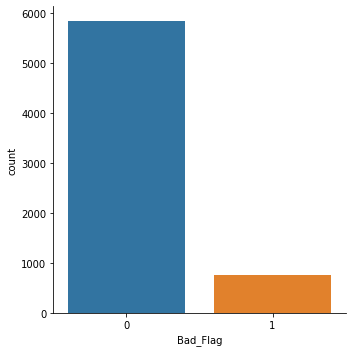

In [39]:
sns.catplot(x = 'Bad_Flag', kind = 'count', data = df_train )

  Мащабирайте данните - необходимо е най-вече за SVM от моделите, които ще използвате;

In [40]:
x_train = StandardScaler().fit_transform(x_train)

x_test = StandardScaler().fit_transform(x_test)

In [41]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

  Използвайки кръстосана валидация с обучителния набор, намерете най-добрия модел, варирайки хиперпараметрите. Използвайте логистична регресия и метода на опорните вектори. Опитайте всички възможности за тези модели и чрез GridSearchCV или по друг начин намерете най-добрия модел като експериментирате с различни приложими метрики за оценка на точността;

Логистична регресия

In [42]:
cv = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

In [43]:
lgr_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000],'penalty': ['l1', 'l2'], 'solver': [ 'liblinear', 'saga','newton-cg', 'lbfgs',]}

In [44]:
grid_lgr = GridSearchCV(LogisticRegression(), lgr_grid, refit = True, verbose = 3, n_jobs=-1, cv = cv)

In [45]:
grid_lgr.fit(x_train, y_train) 

print(grid_lgr.best_estimator_) 

Fitting 5 folds for each of 56 candidates, totalling 280 fits
LogisticRegression(C=0.001, penalty='l1', solver='liblinear')


In [46]:
print(grid_lgr.best_score_)

0.886208455617156


SVM

In [47]:
cv = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)

In [48]:
svm_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 10000],  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf', 'poly', 'sigmoid']}  
   

In [49]:
grid_svm = GridSearchCV(SVC(), svm_grid, refit = True, verbose = 3, n_jobs=-1, cv = cv) 

In [50]:
grid_svm.fit(x_train, y_train) 

print(grid_svm.best_estimator_) 

Fitting 5 folds for each of 105 candidates, totalling 525 fits
SVC(C=0.001, gamma=1)


In [51]:
print(grid_svm.best_score_)

0.886208455617156


След като сте избрали най-добрия модел, вижте как той се справя на тестовия набор. 

In [52]:
lgr_pred = grid_lgr.best_estimator_.predict(x_test) 
print(confusion_matrix(y_test,lgr_pred))
print(classification_report(y_test, lgr_pred)) 

[[1947    0]
 [ 250    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1947
           1       0.00      0.00      0.00       250

    accuracy                           0.89      2197
   macro avg       0.44      0.50      0.47      2197
weighted avg       0.79      0.89      0.83      2197



In [53]:
svm_pred = grid_svm.best_estimator_.predict(x_test) 
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test, svm_pred)) 

[[1947    0]
 [ 250    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1947
           1       0.00      0.00      0.00       250

    accuracy                           0.89      2197
   macro avg       0.44      0.50      0.47      2197
weighted avg       0.79      0.89      0.83      2197

